# Link Prediction

In [23]:
import networkx as nx

In [24]:
G =  nx.Graph()
G.add_edges_from([('A','B'),('A','D'),('B','D'),('B','C'),
                 ('C','D'),('A','E'),('C','F'),('E','F'),
                 ('E','G'),('F','G'),('G','H'),('H','I')])

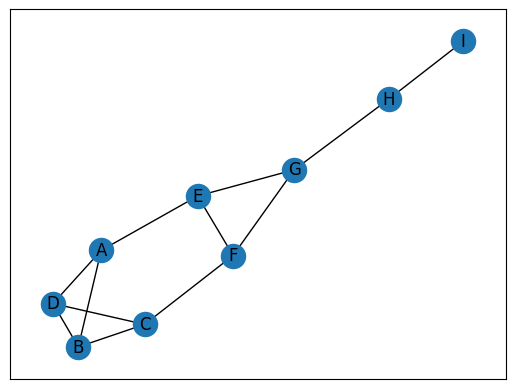

In [25]:
nx.draw_networkx(G)

`What new edges are likely to form in this network`

Given a pair of nodes, how to assess whether they are likely to connect?

- **Number of Commong Neighbors**
- **Jaccard Coefficient**
- **Resource Allocation Index**
- **Adamic-Adar Index**
- **Preferential Attachment Score**
- **Community Common Neighbors**
- **Community Resource Allocation**

<br>

## Measure I: Common Neighbors

The number of common neighbors of nodes *X* and *Y* is
$$
comm\_neigh(X,Y) = |N(X) \cap N(Y)|
$$

where N(X) is the set of neighbors of node *X*

In [26]:
common_neigh = [(e[0],e[1], len(list(nx.common_neighbors(G,e[0],e[1])))) for e in nx.non_edges(G)]
sorted(common_neigh,key = lambda x:x[2],reverse=True)

[('C', 'A', 2),
 ('C', 'G', 1),
 ('C', 'E', 1),
 ('I', 'G', 1),
 ('D', 'F', 1),
 ('D', 'E', 1),
 ('G', 'A', 1),
 ('H', 'F', 1),
 ('H', 'E', 1),
 ('A', 'F', 1),
 ('E', 'B', 1),
 ('F', 'B', 1),
 ('C', 'I', 0),
 ('C', 'H', 0),
 ('I', 'D', 0),
 ('I', 'A', 0),
 ('I', 'E', 0),
 ('I', 'F', 0),
 ('I', 'B', 0),
 ('D', 'H', 0),
 ('D', 'G', 0),
 ('G', 'B', 0),
 ('H', 'B', 0),
 ('H', 'A', 0)]

<br>

## Measure II: Jaccard Coefficient

Number of common neighbors normalized byt the total number of neighbors.

The Jaccard coefficient of nodes *X* and *Y* is
$$
jacc\_coeff(X,Y) = \frac{|N(X) \bigcap N(Y)|}{|N(X)\bigcup N(Y)|}
$$

In [27]:
jc=nx.jaccard_coefficient(G)
sorted(jc,reverse=True,key=lambda x:x[2])

[('C', 'A', 0.5),
 ('I', 'G', 0.3333333333333333),
 ('H', 'F', 0.25),
 ('H', 'E', 0.25),
 ('C', 'G', 0.2),
 ('C', 'E', 0.2),
 ('D', 'F', 0.2),
 ('D', 'E', 0.2),
 ('G', 'A', 0.2),
 ('A', 'F', 0.2),
 ('E', 'B', 0.2),
 ('F', 'B', 0.2),
 ('C', 'I', 0.0),
 ('C', 'H', 0.0),
 ('I', 'D', 0.0),
 ('I', 'A', 0.0),
 ('I', 'E', 0.0),
 ('I', 'F', 0.0),
 ('I', 'B', 0.0),
 ('D', 'H', 0.0),
 ('D', 'G', 0.0),
 ('G', 'B', 0.0),
 ('H', 'B', 0.0),
 ('H', 'A', 0.0)]

<br>

## Measure III: Resource Allocation

Fraction of a "resource" that a node can send to another through their common neighbors.

The Resource Allocation index of nodes *X* and *Y* is
$$
res\_alloc(X,Y)=\sum_{u \in N(X) \cap N(Y)}{\frac{1}{|N(u)|}}
$$

where |N(u)| is the degree of node u.

In [28]:
ra = nx.resource_allocation_index(G)
sorted(ra,reverse=True,key=lambda x :x[2])

[('C', 'A', 0.6666666666666666),
 ('I', 'G', 0.5),
 ('C', 'G', 0.3333333333333333),
 ('C', 'E', 0.3333333333333333),
 ('D', 'F', 0.3333333333333333),
 ('D', 'E', 0.3333333333333333),
 ('G', 'A', 0.3333333333333333),
 ('H', 'F', 0.3333333333333333),
 ('H', 'E', 0.3333333333333333),
 ('A', 'F', 0.3333333333333333),
 ('E', 'B', 0.3333333333333333),
 ('F', 'B', 0.3333333333333333),
 ('C', 'I', 0),
 ('C', 'H', 0),
 ('I', 'D', 0),
 ('I', 'A', 0),
 ('I', 'E', 0),
 ('I', 'F', 0),
 ('I', 'B', 0),
 ('D', 'H', 0),
 ('D', 'G', 0),
 ('G', 'B', 0),
 ('H', 'B', 0),
 ('H', 'A', 0)]

<br>

## Measure IV: Adamic-Adar Index

Similar to resource allocation index, but with log in the denominator.

The Adamic-Adar index of nodes *X* and *Y* is
$$
adamic\_addar(X,Y)=\sum_{u \in N(X) \cap N(Y)}{\frac{1}{log(|N(u)|)}}
$$

<br>

## Measure V: Preferential Attachment

In the preferential attachment model, nodes with high degree get more neighbors.

The preferential attachment score of nodes *X* and *Y* is the product of node's degree
$$
pref\_attach(X,Y) = |N(X)||N(Y)|
$$

In [29]:
pa = nx.preferential_attachment(G)
sorted(pa,reverse=True,key=lambda x:x[2])

[('C', 'G', 9),
 ('C', 'A', 9),
 ('C', 'E', 9),
 ('D', 'F', 9),
 ('D', 'E', 9),
 ('D', 'G', 9),
 ('G', 'B', 9),
 ('G', 'A', 9),
 ('A', 'F', 9),
 ('E', 'B', 9),
 ('F', 'B', 9),
 ('C', 'H', 6),
 ('D', 'H', 6),
 ('H', 'F', 6),
 ('H', 'E', 6),
 ('H', 'B', 6),
 ('H', 'A', 6),
 ('C', 'I', 3),
 ('I', 'D', 3),
 ('I', 'G', 3),
 ('I', 'A', 3),
 ('I', 'E', 3),
 ('I', 'F', 3),
 ('I', 'B', 3)]

<br>

## Community Structure

Some measures consider the community structure of the network for link prediction.  
Assumt he nodes in this network belong to different communities (set of nodes).

A,B,C,D belongs to community1  
E,F,G,H,I belongs to community 2

Pairs of nodes who belongs to the same community and have many common neighbors in their community are likely to form an edge.

In [30]:
G.nodes['A']['community'] = 0
G.nodes['B']['community'] = 0
G.nodes['C']['community'] = 0
G.nodes['D']['community'] = 0
G.nodes['E']['community'] = 1
G.nodes['F']['community'] = 1
G.nodes['G']['community'] = 1
G.nodes['H']['community'] = 1
G.nodes['I']['community'] = 1

<br>

## Measure VI: Community Common Neighbors

Number of common neighbors with bonus for neighbors in same community.

The Common Neighbor Soundarajan-Hopcroft score of nodes *X* and *Y* is
$$
cn\_soundarajan\_hopcroft(X,Y) = |N(X) \cap N(Y)| + \sum_{u \in N(X)\cup N(Y)}{f(u)}
$$

where

$$
f(u) = \begin{cases}
1 & \text{, u in same community as X and Y } \\
0 & \text{otherwise}
\end{cases}
$$

In [31]:
L = list(nx.cn_soundarajan_hopcroft(G))

In [32]:
sorted(L,key=lambda x:x[2],reverse=True)

[('C', 'A', 4),
 ('I', 'G', 2),
 ('H', 'F', 2),
 ('H', 'E', 2),
 ('C', 'G', 1),
 ('C', 'E', 1),
 ('D', 'F', 1),
 ('D', 'E', 1),
 ('G', 'A', 1),
 ('A', 'F', 1),
 ('E', 'B', 1),
 ('F', 'B', 1),
 ('C', 'I', 0),
 ('C', 'H', 0),
 ('I', 'D', 0),
 ('I', 'A', 0),
 ('I', 'E', 0),
 ('I', 'F', 0),
 ('I', 'B', 0),
 ('D', 'H', 0),
 ('D', 'G', 0),
 ('G', 'B', 0),
 ('H', 'B', 0),
 ('H', 'A', 0)]

<br>

## Measure VII: Community Resource Allocation

Similar to resource allocation index, but only considering nodes in the same community.

The Resource Allocation Soundarajan-Hopcroft score of node *X* and *Y* is
$$
ra\_soundarajan\_hopcroft(X,Y)=\sum_{u \in N(X) \cap N(Y)}{\frac{f(u)}{|N(u)|}}
$$
where

$$
f(u) = \begin{cases}
1 & \text{, u in same community as X and Y } \\
0 & \text{otherwise}
\end{cases}
$$

In [33]:
cra = nx.ra_index_soundarajan_hopcroft(G)
sorted(cra,key=lambda x:x[2],reverse=True)

[('C', 'A', 0.6666666666666666),
 ('I', 'G', 0.5),
 ('H', 'F', 0.3333333333333333),
 ('H', 'E', 0.3333333333333333),
 ('C', 'I', 0),
 ('C', 'G', 0),
 ('C', 'E', 0),
 ('C', 'H', 0),
 ('I', 'D', 0),
 ('I', 'A', 0),
 ('I', 'E', 0),
 ('I', 'F', 0),
 ('I', 'B', 0),
 ('D', 'F', 0),
 ('D', 'E', 0),
 ('D', 'H', 0),
 ('D', 'G', 0),
 ('G', 'B', 0),
 ('G', 'A', 0),
 ('H', 'B', 0),
 ('H', 'A', 0),
 ('A', 'F', 0),
 ('E', 'B', 0),
 ('F', 'B', 0)]

In [46]:
G=nx.Graph()
G.add_edges_from([('A','F'),('F','E'),('E','D'),('D','B'),('B','A'),
                     ('C','A'),('C','F'),('C','E'),('C','B'),('B','E')])


In [44]:
sorted(nx.ra_index_soundarajan_hopcroft(G),key=lambda x:x[2],reverse=True)

[('C', 'D', 0.8333333333333333),
 ('G', 'A', 0.7),
 ('E', 'F', 0.3333333333333333),
 ('G', 'B', 0.2),
 ('A', 'B', 0.2),
 ('C', 'H', 0),
 ('C', 'E', 0),
 ('C', 'F', 0),
 ('C', 'B', 0),
 ('D', 'F', 0),
 ('G', 'H', 0),
 ('G', 'E', 0),
 ('G', 'F', 0),
 ('H', 'B', 0),
 ('H', 'A', 0),
 ('A', 'F', 0),
 ('E', 'B', 0),
 ('F', 'B', 0)]

In [43]:
sorted(nx.cn_soundarajan_hopcroft(G),key=lambda x:x[2],reverse=True)

[('C', 'D', 4),
 ('G', 'A', 4),
 ('G', 'B', 2),
 ('H', 'A', 2),
 ('A', 'B', 2),
 ('E', 'F', 2),
 ('C', 'E', 1),
 ('D', 'F', 1),
 ('G', 'H', 1),
 ('G', 'E', 1),
 ('H', 'B', 1),
 ('E', 'B', 1),
 ('C', 'H', 0),
 ('C', 'F', 0),
 ('C', 'B', 0),
 ('G', 'F', 0),
 ('A', 'F', 0),
 ('F', 'B', 0)]